# **Problema de classificação**

Nesta primeira parte vamos usar um exemplo simples para perceber o fluxo completo de um problema de classificação: gerar dados sintéticos, visualizá-los, preparar conjuntos de treino/teste, treinar um modelo e avaliar a performance. Siga as notas antes de cada célula para perceber o que está a acontecer.


Nesta célula importam-se as bibliotecas essenciais (sklearn, numpy e matplotlib), geram-se dados sintéticos com duas classes e faz-se um gráfico inicial para ver como os pontos estão distribuídos.

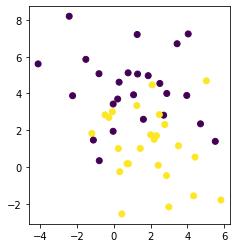

In [ ]:
# Primeiros vamos importar as bibliotecas necessárias
from sklearn.datasets import make_blobs # A biblioteca sklearn contém alguns data sets, vamos importar para podermos trabalhar com ele
import numpy as np
import matplotlib.pyplot as plt # Biblioteca que permite visualizar os dados
from matplotlib import colors

# Dataset - X são as variáveis explicativas e y é a variável a prever; 
# y é uma variável discreta e tem 2 classes; no total existem 50 pontos
X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
# Visualização dos pontos do dataset
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)

Use esta célula para confirmar a dimensão da matriz `X` (número de registos e de variáveis explicativas).

In [ ]:
# X é o array das variáveis explicativas. Ele tem 2 variáveis explicativas e 50 registos de cada
X.shape

(50, 2)

Caso queira inspecionar os valores das variáveis explicativas, pode executar a célula seguinte que devolve a matriz completa `X`.

In [ ]:
X

array([[-0.08623772,  3.00656711],
       [ 1.24891363,  3.3425538 ],
       [ 2.49834553,  4.54713736],
       [ 3.96442822,  3.8934708 ],
       [ 2.18830197,  1.50260746],
       [ 4.33406889, -1.57198798],
       [ 5.82156892, -1.79785446],
       [ 2.07626756,  4.46940465],
       [ 1.99890306,  1.7543274 ],
       [-2.4362703 ,  8.20533812],
       [ 3.43685144,  6.70854703],
       [-1.52932064,  5.85876804],
       [ 1.28616493,  5.06011237],
       [ 0.31367322, -0.26003567],
       [ 2.70514248,  2.81945729],
       [ 1.60240548,  2.59559585],
       [ 0.20161644,  3.69918183],
       [ 2.8599508 , -0.47195652],
       [-0.79930142,  0.34219439],
       [ 0.76983237,  5.12498433],
       [ 0.78662333,  0.17218133],
       [ 2.76800032,  2.31081   ],
       [ 0.24067079,  1.00155445],
       [ 0.71034663,  0.17855734],
       [ 3.51344865,  1.15562948],
       [ 5.51577933,  1.39505598],
       [-0.04303428,  3.42763872],
       [-4.12970955,  5.61102452],
       [ 2.41011981,

Aqui observa-se o vetor `y`, que contém as labels 0 e 1 correspondentes a cada ponto. Isto permite perceber a que classe pertence cada amostra.

In [ ]:
# O array y é a variável de output que queremos prever. Como é um problema de classificação ela é discreta, pois toma valor 0 ou 1
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

Nesta célula faz-se a divisão treino/teste (com 25% para teste), treina-se um modelo KNN com 1 vizinho e avaliam-se as previsões no conjunto de teste. Repare nas métricas geradas automaticamente (matriz de confusão e `classification_report`).

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



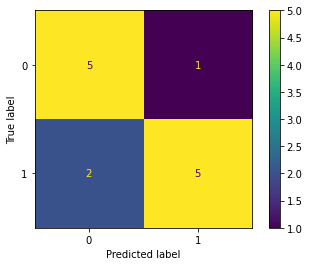

In [ ]:
# A biblioteca sklearn oferece uma função que divide o dataset em treino e teste. Temos de importar
from sklearn.model_selection import train_test_split
# A função permite-nos escolher a porção de teste que queremos 
# Tipicamente a porção de teste é bastante menor que a de treino, pois precisamos mais dados para treinar. 
# Proporções típicas são 80%/75% de treino e 20%/25% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# A biblioteca sklearn tem imensos algoritmos e bastam 2/3 linhas de código para os colocar a correr
# Vamos importar um algortimo de classificação chamado nearest neighbor (vamos falar dele na aula 3)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # Chamar o algoritmo
knn.fit(X_train, y_train) # Aqui estamos a dar os dados de treino (X+y) ao modelo para ele treinar; diz-se que é o fitting
y_pred = knn.predict(X_test) # Aqui estamos a testar o algoritmo treinado, dando-lhe apenas as variáveis explicativas para ele prever a variável de output sem a ver

# Agora vamos calcular as métricas para verificar o desempenho do modelo no dados de teste
# Como é um problema supervised, conseguimos comparar diretamente as labels que o algoritmo preveu e as verdadeiras labels
# A biblioteca sklearn tem muitas métricas já formuladas em funções, bastanto para isso só passar os argumentos. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
# O y_test = y_true: os verdadeiros valores de y
# y_pred: os valores de y que o algoritmo preveu, podem ou não ser os corretos. VAMOS AVALIAR
cm = confusion_matrix(y_test, y_pred, labels=[0, 1]) # Criar a matriz de condusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]) # Para poder ver a matriz
disp.plot() # Fazer o gráfico
# O classification report mostra as métricas accuracy, precision e recall. Mostra ainda a f1-score que é uma métrica que utiliza o precision e o recall
print(classification_report(y_test, y_pred))

Aqui calculamos as mesmas métricas mas no conjunto de treino para perceber como o modelo se comporta quando já viu as labels. Compare com os resultados de teste.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



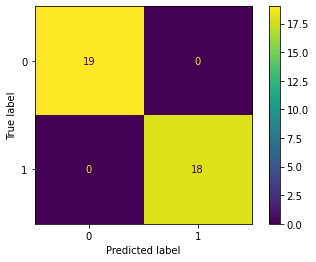

In [ ]:
# Se avaliarmos o desempenho no treino, vamos verificar que vai ser muito melhor, pois o modelo vê as labels de y
y_pred_train = knn.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train, labels=[0, 1]) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]) # Para poder ver a matriz
disp.plot() 
print(classification_report(y_train, y_pred_train))

# **Problema de regressão**

Nesta segunda parte vamos prever valores numéricos. O ficheiro `abalone.csv` será carregado para o Colab e servirá para treinar e avaliar um modelo de regressão linear. As notas guiam cada etapa do pré-processamento até à avaliação.

Carregue o ficheiro `abalone.csv` a partir do seu computador usando o seletor do Colab. Sem este passo o restante código não consegue ler o dataset.

In [ ]:
# Importar um data set de um problema de regressão
from google.colab import files

uploaded = files.upload()

Saving abalone.csv to abalone.csv


Esta célula lê o ficheiro carregado para um DataFrame `df` para podermos trabalhar com os dados.

In [ ]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))

Confirme o tamanho do dataset (`df.shape`) e os tipos de dados (`df.dtypes`) para saber quantas linhas/colunas tem e quais variáveis são numéricas ou categóricas.

In [ ]:
df.shape

(4177, 9)

In [ ]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Normalizamos as variáveis numéricas e aplicamos one-hot encoding às variáveis categóricas para que todas fiquem na mesma escala e formato. O resultado final fica na matriz `X_processed`.

In [ ]:
# Para normalizar os dados, porque são variáveis diferentes (tal como aprenderam no módulo anterior)
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Seleccionar as variáveis numéricas (contínuas) para as normalizar
numerics = ['float64', 'int64']
num_vars = df.select_dtypes(include=numerics).columns.difference(['Rings'])
scaler = StandardScaler()

# Seleccionar as variáveis categóricas
cat_vars = df.select_dtypes(include='object').columns
enc = OneHotEncoder(sparse_output=False)

X_num = scaler.fit_transform(df[num_vars])
X_cat = enc.fit_transform(df[cat_vars])
X_processed = np.concatenate([X_num, X_cat], axis=1)

Confirme a nova dimensão de `X_processed` depois de normalizar e codificar as variáveis.

In [ ]:
X_processed.shape

(4177, 10)

Dividimos os dados processados em treino e teste (25% para teste) para avaliar o modelo de forma justa.

In [ ]:
from sklearn.model_selection import train_test_split
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, df['Rings'], test_size=0.25)

Aqui treinamos uma regressão linear simples, fazemos previsões no teste e calculamos o erro absoluto médio (`mean_absolute_error`) para medir a qualidade das previsões.

In [ ]:
# Aplicar um algoritmo de regressão - regressão linear - que vamos estudar na próxima aula
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train) # Fazer o fittin aos dados de treino
y_pred = reg.predict(X_test) # Prever nos dados de teste sem ver o y_test
# Avaliar a capacidade preditiva, calculando o erro absoluto médio
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # O erro médio é 1,57

1.5782504141372269